In [1]:
# basic plotting imports
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # high res plotting

from scipy import signal
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style('whitegrid')
sns.set_style("whitegrid", {'axes.grid' : False})

### The cell below defines three mathematical functions: a Gaussian, exponential, and double exponential.

In [2]:
# define gaussian function
def func_gauss(time_series, amplitude, center, std):
    return amplitude * np.exp(-(((time_series - center)**2) / (2 * (std**2)) ))

# exponential decay function
def func_exp(time_series, amplitude, tau, offset):
    return amplitude * np.exp(- time_series / tau) + offset

# double exponential equation
def func_2exp(time_series, amplitude_1, tau_1, offset, amplitude_2, tau_2):
    return amplitude_1 * np.exp(- time_series / tau_1) + amplitude_2 * np.exp(- time_series / tau_2) + offset

# linear equation
def func_linear(time_series, slope, offset):
    return (slope * time_series) + offset

### This next cell then uses those functions to create a time series.

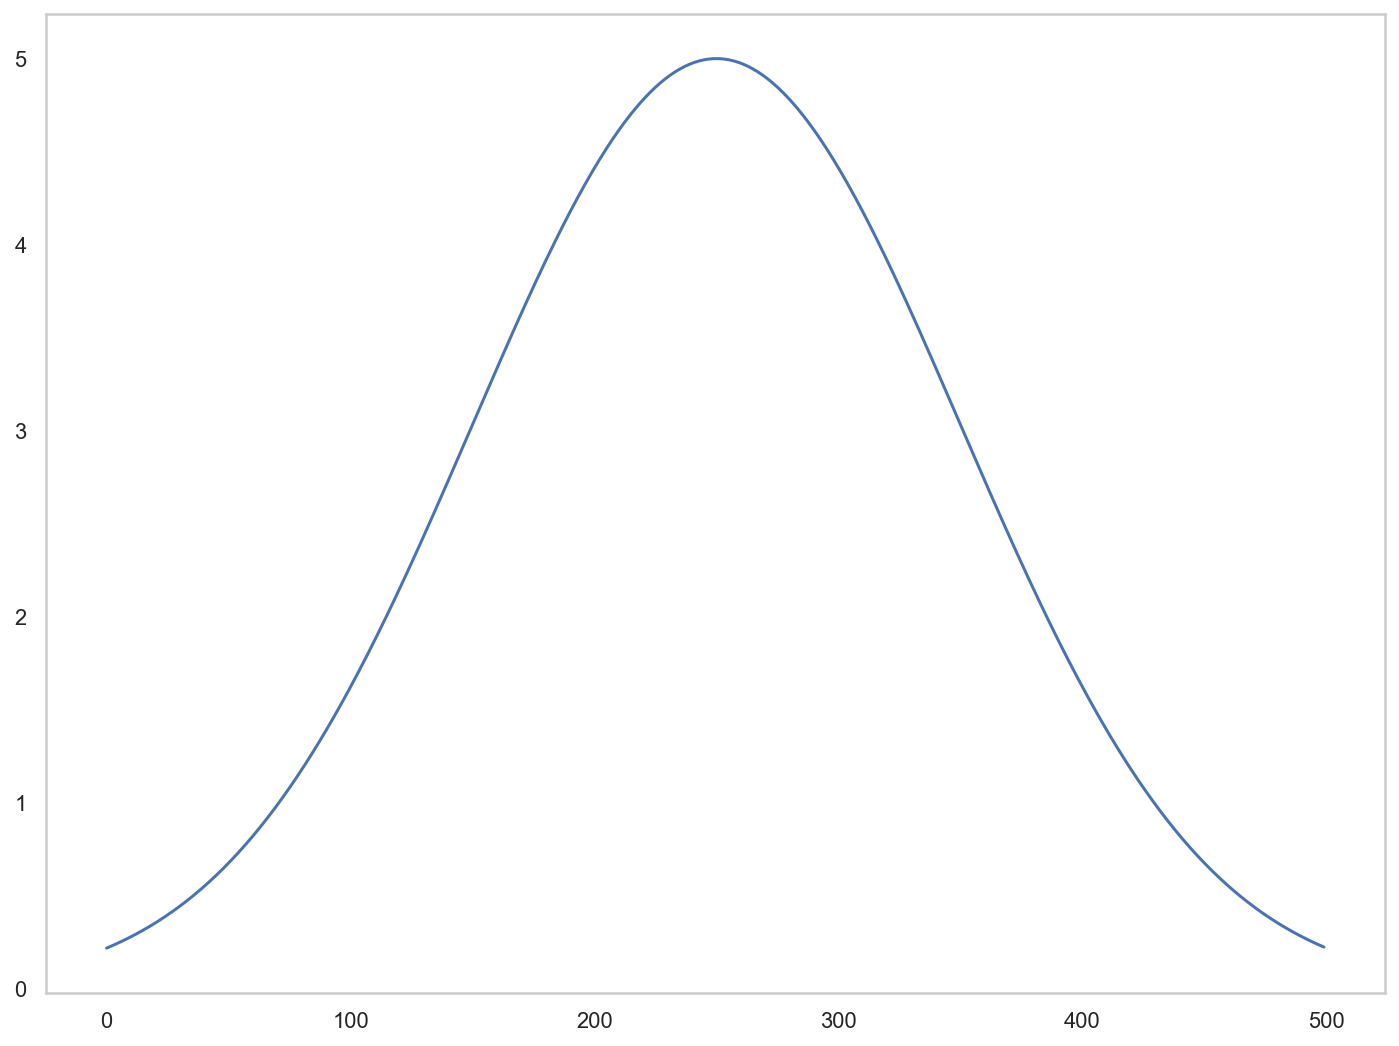

In [3]:
fs = 1000 # sampling rate
kernel_t = 0.5 # number of seconds to simulate
kernel_total_time = int(np.floor(fs * kernel_t))

# create a time-series to pass into the function
kernel_gauss = np.arange(0, kernel_total_time, dtype=int)
kernel_gauss = func_gauss(kernel_gauss, 5, 250, 100)

plt.plot(kernel_gauss)
plt.show()

### This cell then convolves the kernel with a white noise time series.

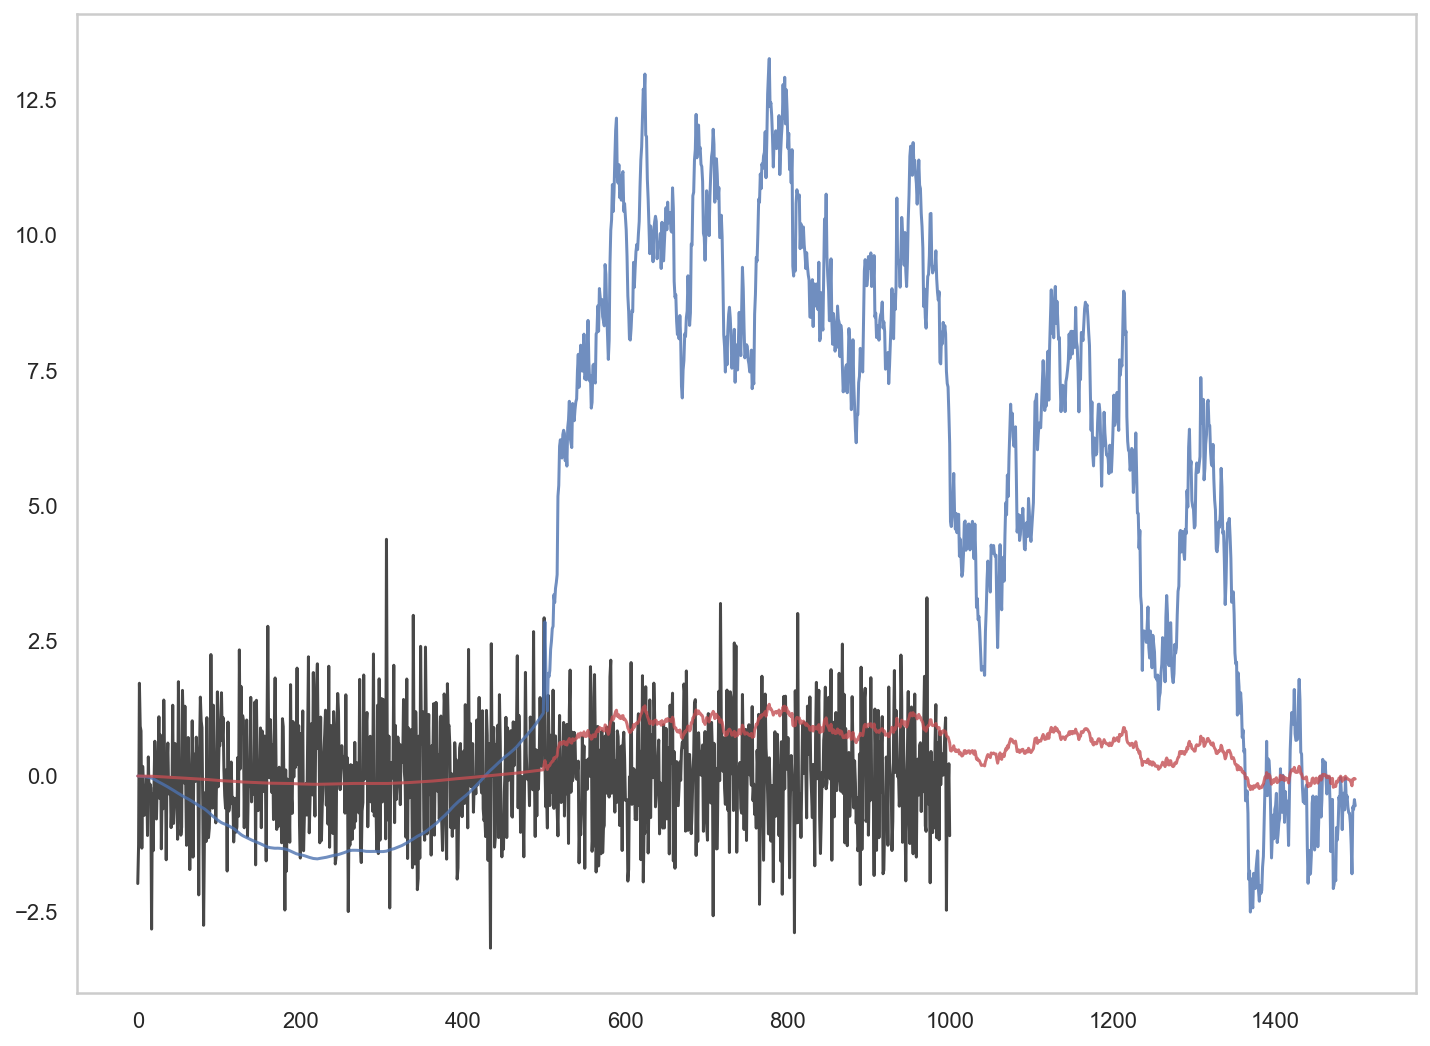

In [5]:
fs = 1000 # sampling rate
data_t = 1 # number of seconds to simulate
data_total_time = int(np.floor(fs * data_t))

# "time-series" (vector zero to 5000)
time_series = np.arange(0, kernel_total_time, dtype=int)

# time series of white noise
white_noise = np.random.normal(0, 1, data_total_time)

# convolved the kernel with with data
kernel_lin1 = func_linear(time_series, 0.001, 0)
data_lin1 = signal.convolve(white_noise, kernel_lin1)

# convolved the kernel with with data
kernel_lin2 = func_linear(time_series, 0.0001, 0)
data_lin2 = signal.convolve(white_noise, kernel_lin2)

plt.plot(white_noise, 'k', alpha = 0.8)
plt.plot(data_lin1, 'b', alpha = 0.8)
plt.plot(data_lin2, 'r', alpha = 0.8)
plt.show()

### But that's hard to see, so now we'll make a Poisson time series (most values are zero, with some non-zero integers).

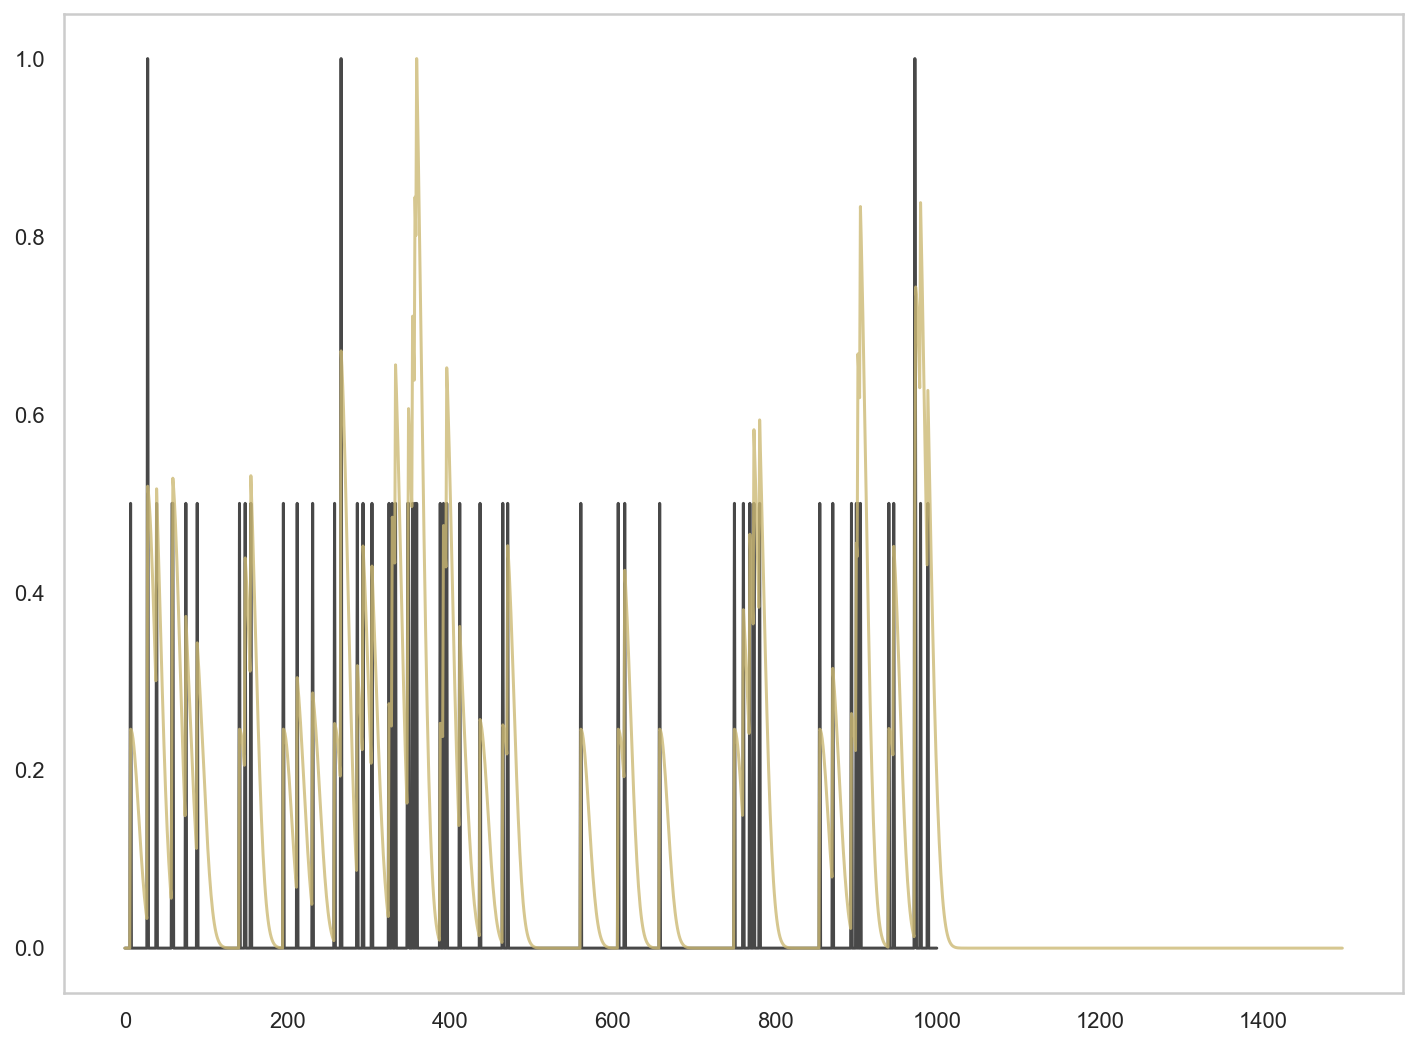

In [6]:
# time series of Poisson noise
poisson_noise = np.random.poisson(0.05, data_total_time)

# convolved the kernel with with data
kernel_gauss = func_gauss(time_series, 1, 0, 10)
data_gauss = signal.convolve(poisson_noise, kernel_gauss)

plt.plot(poisson_noise / np.max(poisson_noise), 'k', alpha = 0.8)
plt.plot(data_gauss / np.max(data_gauss), 'y', alpha = 0.8)
plt.show()

### So we've convolved 1D kernels with 1D time-series, but you're mostly interested in images!
### So let's practice some 2D convolution.

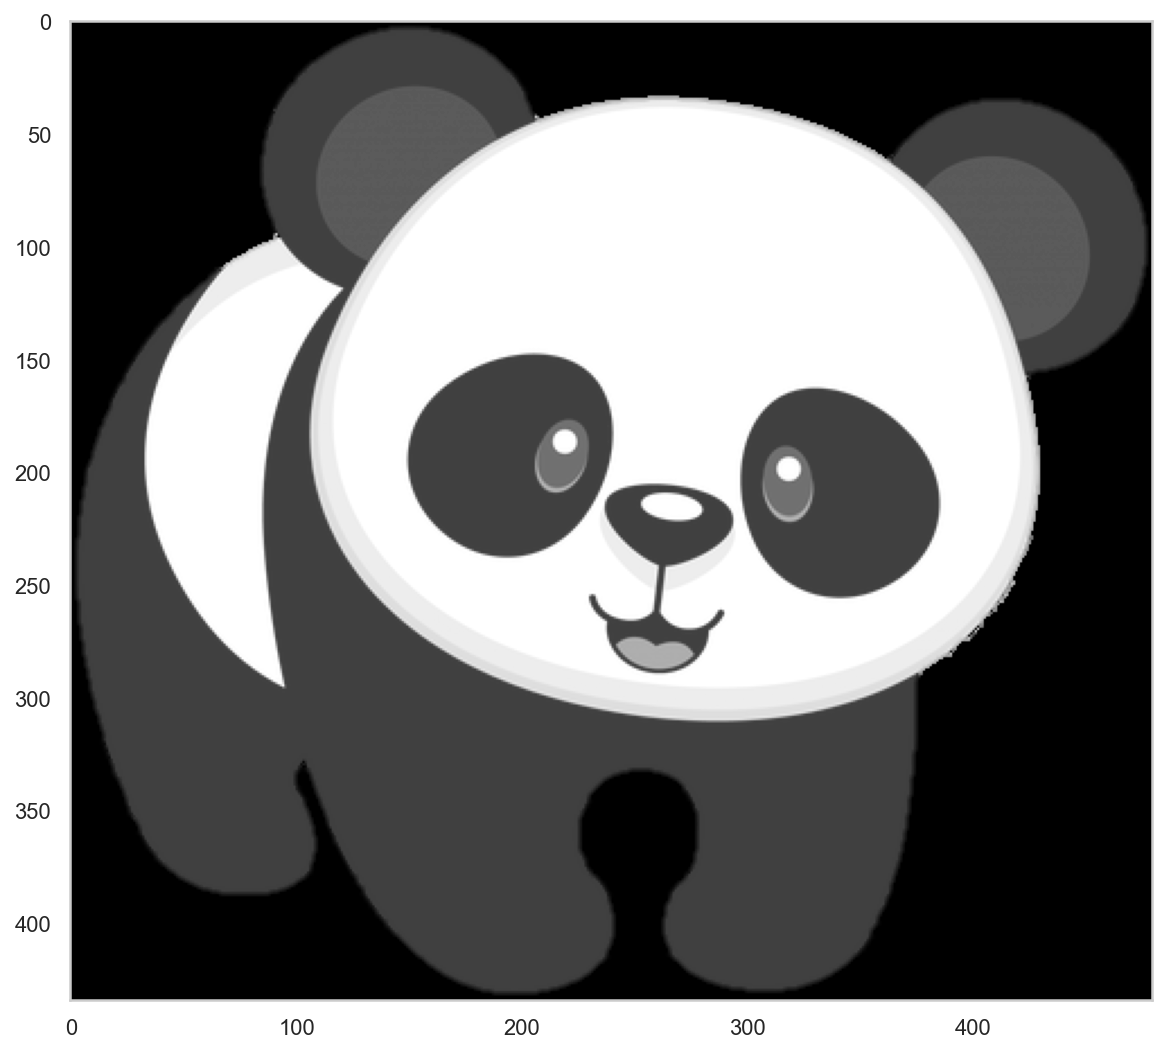

In [8]:
# load our random panda png and take the mean of the channels
img = mpimg.imread('panda.png')
img = np.mean(img, 2) # mean
imgplot = plt.imshow(img, cmap='gray')


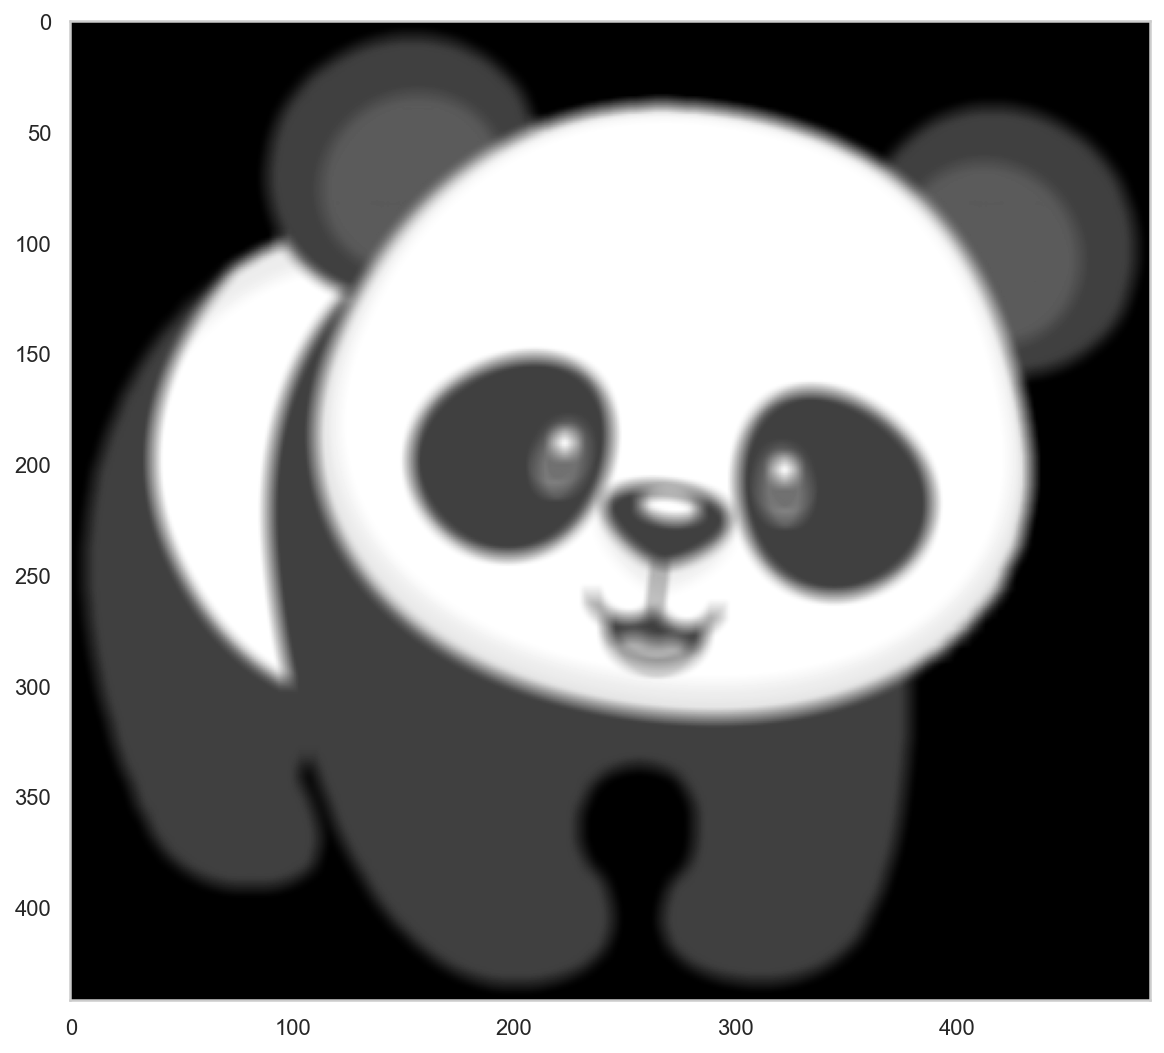

In [11]:
# now let's create some class image kernels:
## identity
## blur
## sharpen
kenrel_size = 9
kernel_identity = [[0, 0, 0], [0, 1, 0], [0, 0, 0]] # all-zeros with a 1 in the middle
kernel_blur = (1/(kenrel_size**2)) * np.ones([kenrel_size, kenrel_size]) # average
kernel_sharpen = [[0, -1, 0], [-1, 8, -1], [0, -1, 0]]

img_kernel = signal.convolve2d(img, kernel_blur)
imgplot = plt.imshow(img_kernel, cmap='gray')

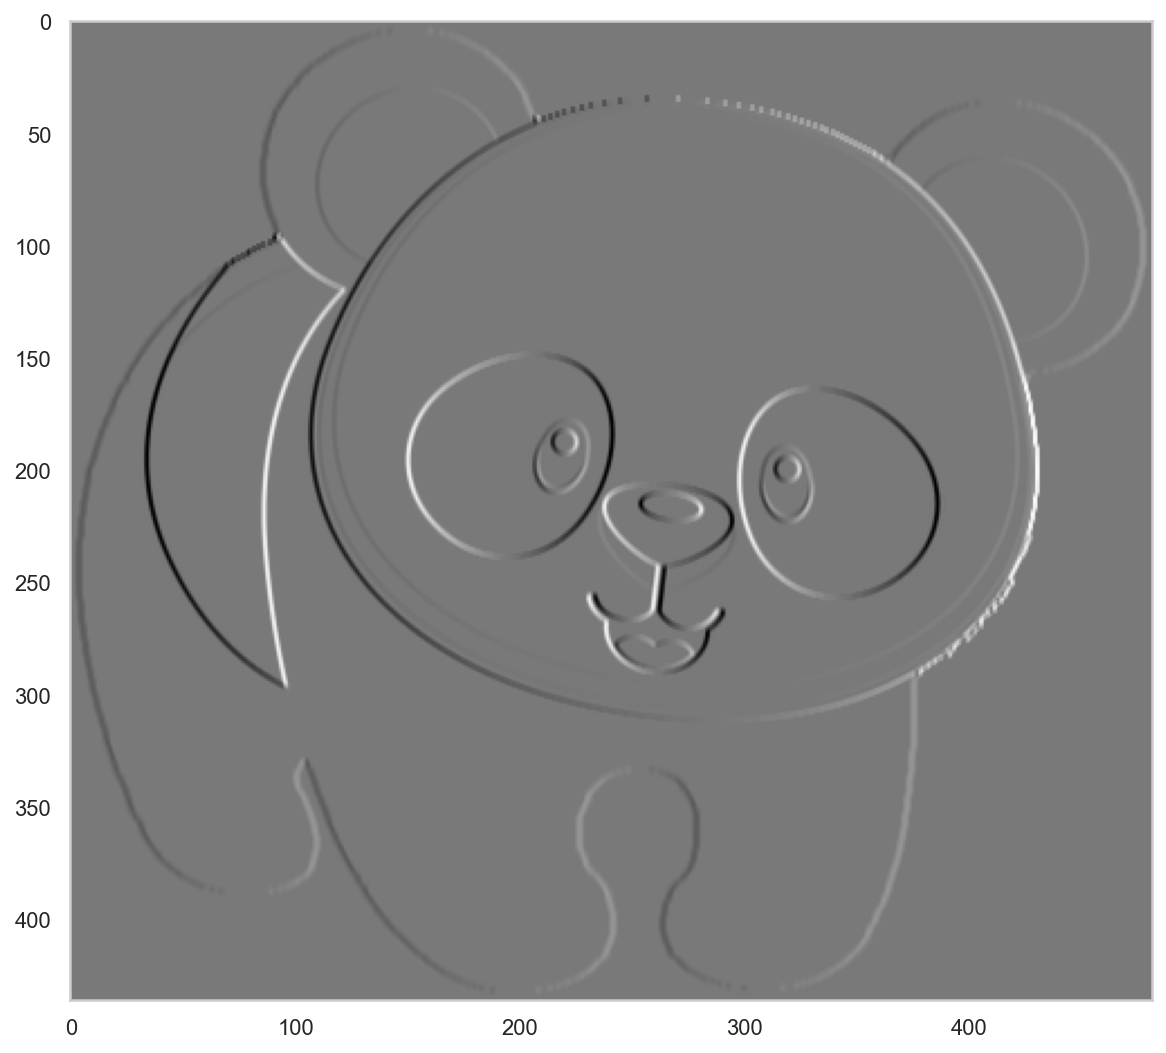

In [12]:
# now play around with kernels and see what happens!
kernel_i_dont_know = [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]

img_kernel = signal.convolve2d(img, kernel_i_dont_know)
imgplot = plt.imshow(img_kernel, cmap='gray')